# Лабораторная работа №2. Визуализация данных.
## Выполнил Коршиков Владислав Игоревич, группа 6133-010402D

In [79]:
# Подключаемся к Google Диск
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Для данной лабораторной работы использовался DataFrame, содержащий все машины из Gran Turismo 6: https://www.kaggle.com/prasertk/gran-turismo-6-cars/version/1

Категориальные: car_type, drive

Числовые: price, hp, weight, torque

In [81]:
# Загрузим датафрейм и удалим строчки с пустующими значениями
gran_turismo_a = pd.read_csv("/content/drive/MyDrive/gran_turismo_gt6.csv") 
gran_turismo_2=gran_turismo_a
gran_turismo=gran_turismo_2.dropna(axis=0)
gran_turismo.isnull().sum()

brand       0
model       0
car_type    0
img_url     0
price       0
drive       0
hp          0
weight      0
torque      0
w_kg        0
dtype: int64

In [82]:
gran_turismo

,brand,model,car_type,img_url,price,drive,hp,weight,torque,w_kg
0,AC Cars,427 S/C '66,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,423200.0,FR,478.0,1311.0,651.0,272 to ? W/Kg
1,AEM,S2000,Tuned,https://www.kudosprime.com/gt6/images/cars/gt6...,100000.0,FR,430.0,1155.0,495.0,278 to 345 W/Kg
3,Abarth,500 '09,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,29500.0,FF,133.0,1035.0,180.0,96 to 251 W/Kg
4,Abarth,Grande Punto '09,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,27000.0,FF,153.0,1240.0,230.0,92 to ? W/Kg
5,Acura,CL 3.2 Type-S '01,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,32180.0,FF,260.0,1592.0,315.0,122 to ? W/Kg
...,...,...,...,...,...,...,...,...,...,...
1265,Volkswagen,Scirocco R '10,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,51500.0,FF,252.0,1410.0,330.0,133 to 298 W/Kg
1266,Volkswagen,W12 Nardo '01,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,1250000.0,MR,574.0,1300.0,620.0,329 to ? W/Kg
1267,Volvo,240 GLT Estate '88,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,15920.0,FR,127.0,1890.0,190.0,50 to ? W/Kg
1268,Volvo,C30 R-Design '09,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,42000.0,FF,227.0,1430.0,319.0,118 to ? W/Kg


In [83]:
#Уберём столбцы, которые не оказывают влияние на целевое значение, чтобы с датафреймом было проще работать
# Также, нам необходимо заменить tuned на street в car_type, так как tuned является подклассом race, но это выделение нигде не используется
gran_turismo.pop('w_kg')
gran_turismo.pop('model')
gran_turismo.pop('img_url')
gran_turismo['car_type'] = np.where((gran_turismo.car_type == 'Tuned'), 'Race', gran_turismo.car_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:

#Разобьём датасет на тестовую и тренировочную датафреймы
gran_turismo_3 = gran_turismo.copy()
y=  gran_turismo_3.drive
print(y)
x=gran_turismo_3.drop('drive', axis=1)
x.head()

0       FR
1       FR
3       FF
4       FF
5       FF
        ..
1265    FF
1266    MR
1267    FR
1268    FF
1269    FF
Name: drive, Length: 1031, dtype: object


,brand,car_type,price,hp,weight,torque
0,AC Cars,Street,423200.0,478.0,1311.0,651.0
1,AEM,Race,100000.0,430.0,1155.0,495.0
3,Abarth,Street,29500.0,133.0,1035.0,180.0
4,Abarth,Street,27000.0,153.0,1240.0,230.0
5,Acura,Street,32180.0,260.0,1592.0,315.0


## 1 Matplotlib

#### 1.1 Построить любой график (любого рода) с помощью чистого matplotlib / pylab

(array([421.,   0., 222.,   0.,   0., 163.,   0., 207.,   0.,  18.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

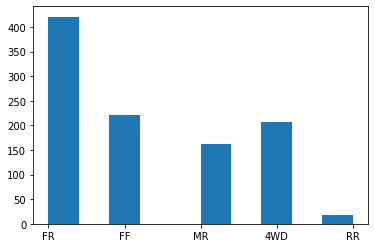

In [85]:
plt.hist(gran_turismo['drive'])

#### 1.2 Построить несколько суб-графиков на одном графике используя .subplot.

Text(0, 0.5, 'Quantity')

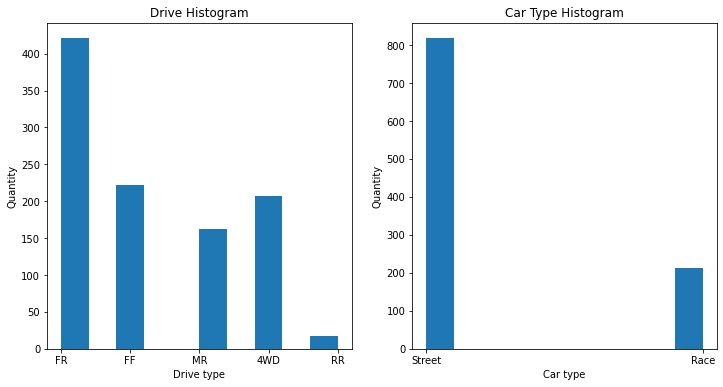

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(gran_turismo['drive'])
ax1.set_title('Drive Histogram')
ax1.set_xlabel('Drive type')
ax1.set_ylabel('Quantity')
ax2.hist(gran_turismo['car_type'])
ax2.set_title('Car Type Histogram')
ax2.set_xlabel('Car type')
ax2.set_ylabel('Quantity')



### 2 На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой). Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.


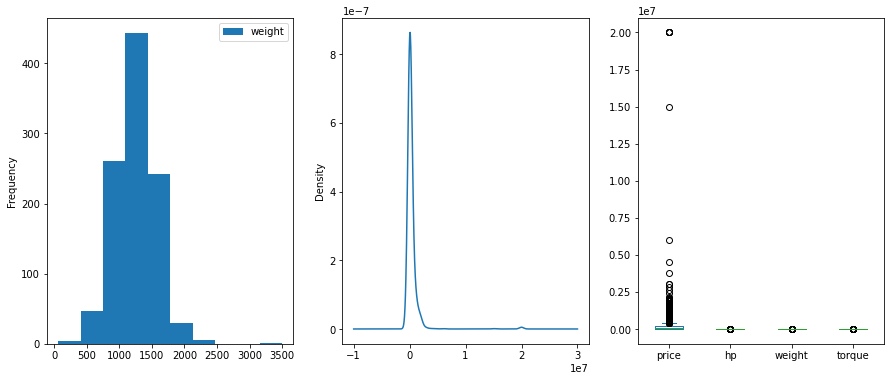

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
gran_turismo.plot(y='weight', kind='hist', ax=ax1)
gran_turismo['price'].plot.kde(y='weight', ax=ax2)
gran_turismo.plot.box(by=[['drive']], ax=ax3)

## 3 Seaborn

#### 3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

Между разными признаками не наблюдается сильной корреляции 

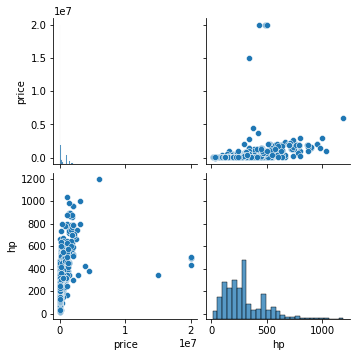

In [88]:
sns.pairplot(gran_turismo.iloc[::, 2:-2])

#### 3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

Существует корреляция между очками здоровья машины и её ценой

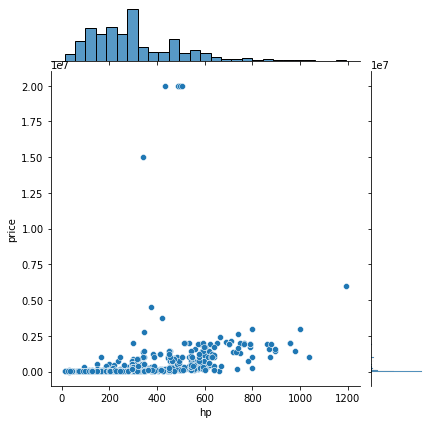

In [89]:
sns.jointplot(x='hp', y='price', data=gran_turismo)

#### 3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

В игре заметно больше машин для уличных гонок, у полноценных гоночных машин в среднем больше hp

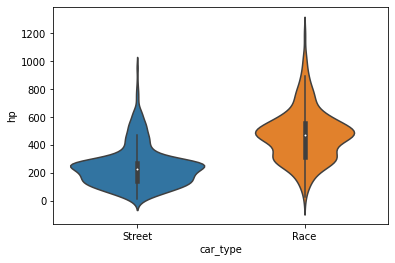

In [90]:
sns.violinplot(x='car_type', y='hp', data=gran_turismo)

#### 3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)

Сильная корреляция между torque (крутящий момент двигателя) и hp(очки здоровья) 

In [91]:
gran_turismo_4 = gran_turismo.copy()
gran_turismo_4.pop('car_type')
gran_turismo_4.pop('drive')
gran_turismo_4.pop('brand')

gran_turismo_4


,price,hp,weight,torque
0,423200.0,478.0,1311.0,651.0
1,100000.0,430.0,1155.0,495.0
3,29500.0,133.0,1035.0,180.0
4,27000.0,153.0,1240.0,230.0
5,32180.0,260.0,1592.0,315.0
...,...,...,...,...
1265,51500.0,252.0,1410.0,330.0
1266,1250000.0,574.0,1300.0,620.0
1267,15920.0,127.0,1890.0,190.0
1268,42000.0,227.0,1430.0,319.0


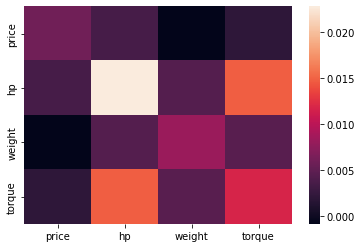

In [92]:
sns.heatmap(gran_turismo_4.fillna(0).iloc[::, 0:4].apply(lambda x: ((x - x.min())/(x.max() - x.min())), axis=0).cov())

### 4 Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

In [93]:
# Импортируем нужный инструмент
from scipy.stats import probplot

Ближе всего к нормальному распределению признак weight(вес), однако, имеются две аномалии(в игре есть аномально тяжёлый и аномально лёгкий агрегат)

((array([-3.20638086, -2.94184172, -2.79426121, ...,  2.79426121,
          2.94184172,  3.20638086]),
  array([  63.,  369.,  385., ..., 2390., 2404., 3500.])),
 (309.1735702549484, 1247.2638215324928, 0.9893648298365082))

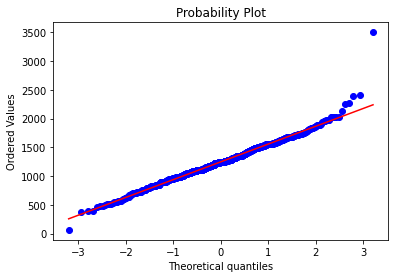

In [94]:
probplot(gran_turismo['weight'].fillna(0), dist="norm", plot=plt)

### 5 Построить любой график (связанный с вашими данными) с помощью plotly

plotly позволяет строить интерактивные графики

In [95]:
!pip install plotly
import plotly.express as px

In [96]:
px.histogram(gran_turismo, x='weight')

In [97]:
px.line(np.arange(0, 100))

In [98]:
px.histogram(gran_turismo, x='torque', y='hp', marginal="box")

In [99]:
px.imshow([[1, 80, 45],
           [80, 1, 35],
           [45, 35, 1]])